# Exploring the NL East with pybaseball

A brief analysis and visualization of the NL East division in 2022. Teams: Braves, Marlins, Mets, Nationals, Phillies.

In [1]:
import pybaseball as pyball
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
teams = pyball.fangraphs_teams  #this was put in by TJG to see team codes
teams()

,yearID,lgID,teamID,franchID,teamIDfg,teamIDBR,teamIDretro
0,1871,NaN,BS1,BNA,16,BOS,BS1
1,1871,NaN,CH1,CNA,17,CHI,CH1
2,1871,NaN,CL1,CFC,1020,CLE,CL1
3,1871,NaN,FW1,KEK,1042,KEK,FW1
4,1871,NaN,NY2,NNA,1053,NYU,NY2
...,...,...,...,...,...,...,...
2950,2020,NL,PIT,PIT,27,PIT,PIT
2951,2020,NL,SDN,SDP,29,SDP,SDN
2952,2020,NL,SFN,SFG,30,SFG,SFN
2953,2020,NL,SLN,STL,28,STL,SLN


In [4]:
newdf = pyball.pitching_stats(2015, 2022,league='all', qual=1, ind=1)

In [5]:
newdf.describe


<bound method NDFrame.describe of        IDfg  Season             Name Team  Age   W  L  WAR   ERA   G  ...  \
447   10954    2018     Jacob deGrom  NYM   30  10  9  9.0  1.70  32  ...   
607    2036    2015  Clayton Kershaw  LAD   27  16  7  8.6  2.13  33  ...   
1192  10603    2017       Chris Sale  BOS   28  17  8  7.6  2.90  32  ...   
857   13125    2019      Gerrit Cole  HOU   28  20  5  7.5  2.50  33  ...   
874    3137    2018     Max Scherzer  WSN   33  18  7  7.5  2.53  33  ...   
...     ...     ...              ...  ...  ...  .. ..  ...   ...  ..  ...   
4767  13418    2017       Chris Beck  CHW   26   2  1 -1.2  6.40  57  ...   
3480  11528    2016       Josh Osich  SFG   27   1  3 -1.2  4.71  59  ...   
4893  15846    2021      Adam Plutko  BAL   29   1  2 -1.2  6.71  38  ...   
3675  18282    2018    Jarlin Garcia  MIA   25   3  3 -1.3  4.91  29  ...   
4640   9388    2018      Josh Tomlin  CLE   33   2  5 -1.4  6.14  32  ...   

        LA  Barrels  Barrel%  maxEV  Hard

In [3]:
df = pyball.pitching_stats_range("2022-06-01", "2022-06-10")

c:\Users\metsy\source\repos\pybaseball\TJGPyBaseball Environment\lib\site-packages\pybaseball\league_pitching_stats.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  table = table.drop('',1)


In [4]:
df.describe

<bound method NDFrame.describe of                  Name  Age  #days     Lev             Tm  G  GS    W    L  \
1        Albert Abreu   26      1  Maj-AL    Kansas City  3   0  NaN  NaN   
2         Bryan Abreu   25      1  Maj-AL        Houston  4   0  1.0  NaN   
3     Domingo Acevedo   28      3  Maj-AL        Oakland  4   0  NaN  NaN   
4          Jason Adam   30      2  Maj-AL      Tampa Bay  5   0  NaN  NaN   
5           Joan Adon   23      4  Maj-NL     Washington  2   2  NaN  2.0   
..                ...  ...    ...     ...            ... ..  ..  ...  ...   
479         Alex Wood   31      3  Maj-NL  San Francisco  2   2  NaN  1.0   
480     Jake Woodford   25      7  Maj-NL      St. Louis  1   0  NaN  NaN   
481       Kyle Wright   26      4  Maj-NL        Atlanta  2   2  2.0  NaN   
482    Ryan Yarbrough   30      6  Maj-AL      Tampa Bay  1   1  NaN  1.0   
483  Bruce Zimmermann   27      1  Maj-AL      Baltimore  2   2  NaN  2.0   

      SV  ...   Str   StL   StS  GB/FB   

In [5]:
df.size

18600

In [2]:
# Get all NL East Team Records for 2018
year = 2022

braves = pyball.schedule_and_record(year, 'ATL')
marlins = pyball.schedule_and_record(year, 'MIA')
mets = pyball.schedule_and_record(year, 'NYN')
nationals = pyball.schedule_and_record(year, 'WSN')
phillies = pyball.schedule_and_record(year, 'CIN')

c:\Users\metsy\source\repos\pybaseball\TJGPyBaseball Environment\lib\site-packages\pybaseball\team_results.py:70: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('',1) #not a useful column
c:\Users\metsy\source\repos\pybaseball\TJGPyBaseball Environment\lib\site-packages\pybaseball\team_results.py:83: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Streak2',1)
c:\Users\metsy\source\repos\pybaseball\TJGPyBaseball Environment\lib\site-packages\pybaseball\team_results.py:70: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('',1) #not a useful column
c:\Users\metsy\source\repos\pybaseball\TJGPyBaseball Environment\lib\site-packages\pybaseball\team_results.py:83: FutureWarning: In a futu

## Summary Statistics
A quick glance at the summary statistics for each team in order of their ending division rank.

Looking at these statistics, you can see the similarity in overall performance. Mean Runs are very similar for the top three teams with the #3 Mets slightly edging out the Braves and marlins. However, in Runs Allowed, the #2 marlins come out in front, with the Braves second, and the Mets third.

Interestingly, the hottest streak belongs to the Nationals, who ended the season ranked 4th in the division.

In [26]:
braves.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,21.000000,21.000000,21.000000,21.000000,21.000000,20.000000
mean,4.047619,4.428571,9.047619,2.809524,38687.000000,-0.150000
std,3.308719,3.370036,0.218218,0.679636,6473.501062,1.460894
min,1.000000,0.000000,9.000000,2.000000,25829.000000,-2.000000
25%,2.000000,2.000000,9.000000,2.000000,34183.000000,-1.000000
50%,3.000000,4.000000,9.000000,3.000000,38888.000000,-1.000000
75%,5.000000,6.000000,9.000000,3.000000,41931.000000,1.000000
max,16.000000,12.000000,10.000000,4.000000,52052.000000,2.000000


In [27]:
marlins.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,19.000000,19.000000,19.000000,19.000000,19.000000,18.000000
mean,4.052632,3.631579,9.052632,3.105263,21984.368421,0.888889
std,3.008759,2.521255,0.229416,1.149625,13332.183326,2.494438
min,0.000000,0.000000,9.000000,2.000000,8475.000000,-3.000000
25%,2.000000,2.000000,9.000000,2.000000,11733.000000,-1.000000
50%,3.000000,3.000000,9.000000,3.000000,13412.000000,1.000000
75%,5.000000,5.500000,9.000000,4.000000,37886.000000,2.000000
max,11.000000,10.000000,10.000000,5.000000,41931.000000,6.000000


In [28]:
mets.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,21.000000,21.000000,21.000000,21.000000,20.000000,20.000000
mean,4.619048,2.904762,9.095238,1.047619,29110.400000,0.950000
std,2.268836,2.567192,0.300793,0.218218,6181.033123,1.605091
min,2.000000,0.000000,9.000000,1.000000,20939.000000,-2.000000
25%,3.000000,1.000000,9.000000,1.000000,24278.750000,-1.000000
50%,5.000000,3.000000,9.000000,1.000000,28125.000000,1.000000
75%,6.000000,5.000000,9.000000,1.000000,33017.500000,2.000000
max,10.000000,10.000000,10.000000,2.000000,43820.000000,3.000000


In [29]:
nationals.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,22.000000,22.000000,22.0,22.000000,22.000000,21.000000
mean,3.681818,5.181818,9.0,4.000000,20732.000000,-1.714286
std,3.329327,3.959754,0.0,1.195229,10419.487233,2.935010
min,0.000000,0.000000,9.0,2.000000,8676.000000,-8.000000
25%,2.000000,2.000000,9.0,3.000000,12493.750000,-3.000000
50%,3.000000,5.000000,9.0,4.500000,18571.500000,-1.000000
75%,4.000000,6.750000,9.0,5.000000,27350.000000,1.000000
max,14.000000,16.000000,9.0,5.000000,42263.000000,2.000000


In [30]:
phillies.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,20.000000,20.000000,20.0,20.000000,20.000000,19.000000
mean,3.150000,5.900000,9.0,4.400000,31516.700000,-3.947368
std,2.134306,2.751076,0.0,1.142481,14197.158997,3.703957
min,0.000000,1.000000,9.0,1.000000,9192.000000,-11.000000
25%,1.000000,3.750000,9.0,4.500000,22460.500000,-6.500000
50%,3.000000,6.000000,9.0,5.000000,31217.000000,-3.000000
75%,5.000000,8.250000,9.0,5.000000,40700.500000,-1.500000
max,6.000000,10.000000,9.0,5.000000,52995.000000,1.000000


## A look at Wins, Win Percentages, and Games Back
Comparing the wins, win percentages, and games back for each team of the NL East

First we gather each team's Wins, Losses, and Win Percentages at the time of each game

In [40]:
# Gets wins-to-date, losses-to-date, and win_percent-to-date for each team
braves['Wins'] = np.where(braves['W/L']=='W', 1, (np.where(braves['W/L']=='W-wo', 1, 0))).cumsum()
braves['Losses'] = np.where(braves['W/L']=='L', 1, (np.where(braves['W/L']=='L-wo', 1, 0))).cumsum()
braves['Win_Percentage'] = braves['Wins'] / (braves['Wins'] + braves['Losses'])

marlins['Wins'] = np.where(marlins['W/L']=='W', 1, (np.where(marlins['W/L']=='W-wo', 1, 0))).cumsum()
marlins['Losses'] = np.where(marlins['W/L']=='L', 1, (np.where(marlins['W/L']=='L-wo', 1, 0))).cumsum()
marlins['Win_Percentage'] = marlins['Wins'] / (marlins['Wins'] + marlins['Losses'])

mets['Wins'] = np.where(mets['W/L']=='W', 1, (np.where(mets['W/L']=='W-wo', 1, 0))).cumsum()
mets['Losses'] = np.where(mets['W/L']=='L', 1, (np.where(mets['W/L']=='L-wo', 1, 0))).cumsum()
mets['Win_Percentage'] = mets['Wins'] / (mets['Wins'] + mets['Losses'])

nationals['Wins'] = np.where(nationals['W/L']=='W', 1, (np.where(nationals['W/L']=='W-wo', 1, 0))).cumsum()
nationals['Losses'] = np.where(nationals['W/L']=='L', 1, (np.where(nationals['W/L']=='L-wo', 1, 0))).cumsum()
nationals['Win_Percentage'] = nationals['Wins'] / (nationals['Wins'] + nationals['Losses'])

phillies['Wins'] = np.where(phillies['W/L']=='W', 1, (np.where(phillies['W/L']=='W-wo', 1, 0))).cumsum()
phillies['Losses'] = np.where(phillies['W/L']=='L', 1, (np.where(phillies['W/L']=='L-wo', 1, 0))).cumsum()
phillies['Win_Percentage'] = phillies['Wins'] / (phillies['Wins'] + phillies['Losses'])

### Graphing Wins and Win Percentages
Here we can see that the Braves and marlins were in a tightly contested race all year long. At about game 120 the braveswent into a small slump while the Mets ascended, leading to a short period where the Braves dropped to 3rd place. This didn't last long however, as the Braves got back into a groove and found their way to 2nd and ultimately 1st place.

Text(0.5, 1.0, 'NL East Wins Comparison (2022)')

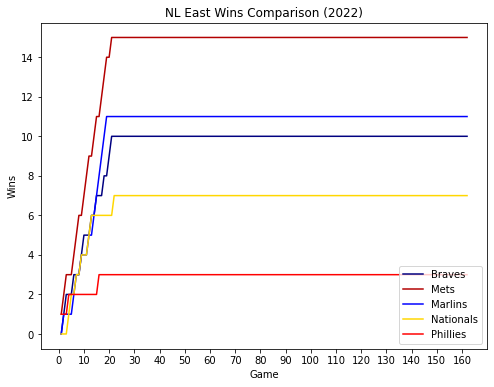

In [41]:
# Graph Wins Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(braves['Wins'], label='Braves', c='navy')
plt.plot(mets['Wins'], label='Mets', c='#b30000')
plt.plot(marlins['Wins'], label='Marlins', c='blue')
plt.plot(nationals['Wins'], label='Nationals', c='gold')
plt.plot(phillies['Wins'], label='Phillies', c='red')

plt.xticks(np.arange(0, len(braves.index), step=10))
plt.xlabel('Game')
plt.ylabel('Wins')

plt.legend(loc='lower right')

plt.title("NL East Wins Comparison ({})".format(year))

Text(0.5, 1.0, 'NL East Win Percentage Comparison (2022)')

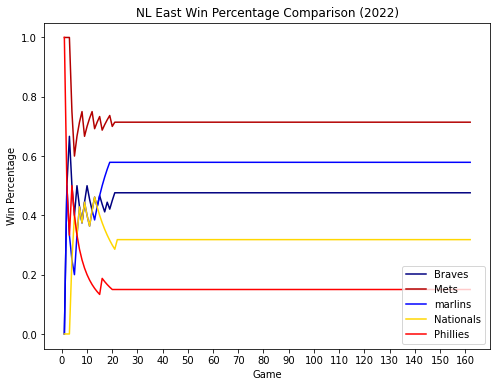

In [42]:
# Graph Win Percentage Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(braves['Win_Percentage'], label='Braves', c='navy')
plt.plot(mets['Win_Percentage'], label='Mets', c='#b30000')
plt.plot(marlins['Win_Percentage'], label='marlins', c='blue')
plt.plot(nationals['Win_Percentage'], label='Nationals', c='gold')
plt.plot(phillies['Win_Percentage'], label='Phillies', c='red')

plt.xticks(np.arange(0, len(braves.index), step=10))
plt.xlabel('Game')
plt.ylabel('Win Percentage')

plt.legend(loc='lower right')

plt.title("NL East Win Percentage Comparison ({})".format(year))

### Graphing Games Back

First we create a modified column to numerically represent 'Games Back'

In [43]:
# Insert new column called 'int_GB' that represents GB as either negative (meaning behind) or 0.0 meaning in first or tied for first
def modify_gb(gb):
    if gb == 'Tied':
        gb = 0.0
    elif 'up' in gb:
        gb = 0.0 # float(gb.replace('up ', ''))
    else:
        gb = -float(gb)
    
    return gb
    
braves['int_GB'] = braves['GB'].dropna().apply(modify_gb)
mets['int_GB'] = mets['GB'].dropna().apply(modify_gb)
marlins['int_GB'] = marlins['GB'].dropna().apply(modify_gb)
nationals['int_GB'] = nationals['GB'].dropna().apply(modify_gb)
phillies['int_GB'] = phillies['GB'].dropna().apply(modify_gb)

#### What the Graph Shows
Graphing 'Games Back' gives an even clearer image of how the NL East was contended throughout the year. 

The Phillies fell to an early 10 Games Back, and never recovered. They ended the year at a season low of 28 Games Back.

The nationals, while contending early on, fell to ~13 Games Back mid-season. They showed signs of life in games 90-110, even surpassing the Mets for 3rd place. However, they would soon fall to a season low of ~15 Games Back.

The Braves and Marlins were consistely within ~4 Games of each other for most of the season. While the Braves had a rough patch in games 110-135 -- dropping to a season low of 6 Games Back, and falling behind the Mets for 2nd place -- they quickly recovered in the final games of the season. They would go on to defeat the Marlins in a Game 163 Divisional Tie-Breaker, becoming the NL East Champions.

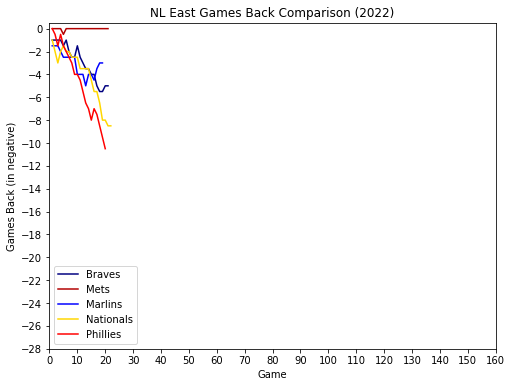

In [44]:
# Graph NL East Games Back Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(braves['int_GB'], label='Braves', c='navy')
plt.plot(mets['int_GB'], label='Mets', c='#b30000')
plt.plot(marlins['int_GB'], label='Marlins', c='blue')
plt.plot(nationals['int_GB'], label='Nationals', c='gold')
plt.plot(phillies['int_GB'], label='Phillies', c='red')

plt.xticks(np.arange(0, len(braves.index), step=10))
plt.yticks(np.arange(0, -30, step=-2))
plt.xlabel('Game')
plt.ylabel('Games Back (in negative)')

plt.title("NL East Games Back Comparison ({})".format(year))
plt.legend(loc='lower left')

## Graphing Total Runs and Runs Allowed

First we create new columns for Total Runs, and Total Runs Allowed

In [45]:
# Get total runs-to-date and total runs_allowed-to-date for each team
braves['Total_Runs'] = braves['R'].cumsum()
braves['Total_RA'] = braves['RA'].cumsum()

marlins['Total_Runs'] = marlins['R'].cumsum()
marlins['Total_RA'] = marlins['RA'].cumsum()

mets['Total_Runs'] = mets['R'].cumsum()
mets['Total_RA'] = mets['RA'].cumsum()

nationals['Total_Runs'] = nationals['R'].cumsum()
nationals['Total_RA'] = nationals['RA'].cumsum()

phillies['Total_Runs'] = phillies['R'].cumsum()
phillies['Total_RA'] = phillies['RA'].cumsum()

#### What the Graph Shows
Graphing Runs and Runs Allowed illustrates some of the causal factors in each teams divisional rank.

The Phillies were scoring Runs at a rate similar to every team but the Marlins most season long. However, they were the worst in Runs Allowed by a large margin. By the end of the season, the Phillies had given up over 800 runs while no other team broke the 700 mark.

The Nationals had as similar problem. While they scored at comparable rates to the rest of the division, their pitching didn't fare so well. They were the 2nd worst in Runs Allowed almost all season.

The Mets were also scoring at rates comparable to the rest of the division. However, in Runs Allowed they consistently outpaced the Braves and Marlins until late season. 

You can see the decreased rate of Runs Allowed for the Mets from games 110-130, while in the same stretch of time the Braves saw an increase in their rate of Runs Allowed. This coincides with the time period in which the Mets and Braves swapped for 2nd place.

The Marlins consistently outscored the entire division right up to the end of the season. At the same time, their Runs Allowed were close to the Braves all year. By these two graphs alone, I would have predicted the Marlins won the division. It would, however, come down to the final tie-breaker game, with the Braves coming away victorious.

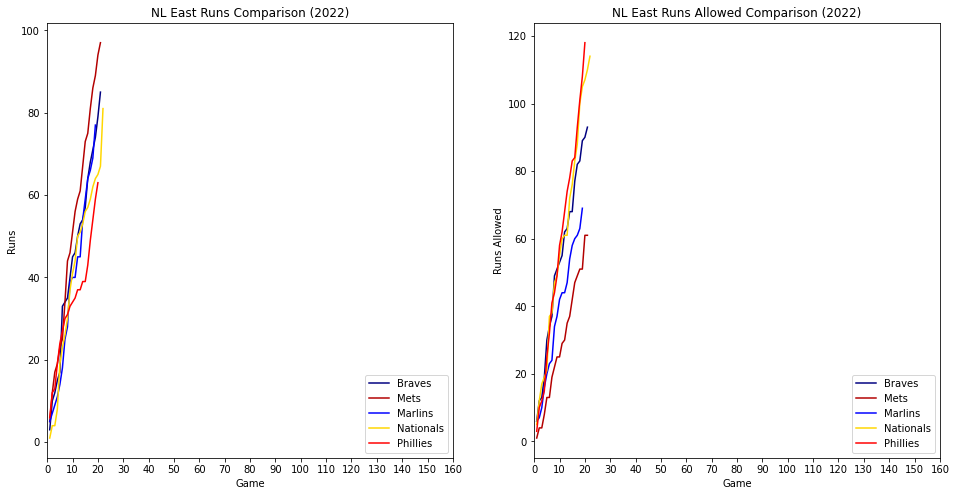

In [46]:
# Graph Runs and Runs Allowed Comparisons #
plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
plt.plot(braves['Total_Runs'], label='Braves', c='navy')
plt.plot(mets['Total_Runs'], label='Mets', c='#b30000')
plt.plot(marlins['Total_Runs'], label='Marlins', c='blue')
plt.plot(nationals['Total_Runs'], label='Nationals', c='gold')
plt.plot(phillies['Total_Runs'], label='Phillies', c='red')

plt.xticks(np.arange(0, len(braves.index), step=10))
plt.xlabel('Game')
plt.ylabel('Runs')

plt.title("NL East Runs Comparison ({})".format(year))
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(braves['Total_RA'], label='Braves', c='navy')
plt.plot(mets['Total_RA'], label='Mets', c='#b30000')
plt.plot(marlins['Total_RA'], label='Marlins', c='blue')
plt.plot(nationals['Total_RA'], label='Nationals', c='gold')
plt.plot(phillies['Total_RA'], label='Phillies', c='red')

plt.xticks(np.arange(0, len(braves.index), step=10))
plt.xlabel('Game')
plt.ylabel('Runs Allowed')

plt.title("NL East Runs Allowed Comparison ({})".format(year))
plt.legend(loc='lower right')

### Graphing Total Home Attendance
For fun, we take a look at each teams total home attendance throughout the season.

First we get each teams total home_attendance-to-date

In [49]:
braves['Total_Home_Attendance'] = braves[braves['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
marlins['Total_Home_Attendance'] = marlins[marlins['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
mets['Total_Home_Attendance'] = mets[mets['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
nationals['Total_Home_Attendance'] = nationals[nationals['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
phillies['Total_Home_Attendance'] = phillies[phillies['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()

#### What the Graph Shows
The Phillies and Nationals saw dramatically less people come to the ballpark compared to the rest of the division, with the Nationals coming in last with ~1.5 million attendees.

The Marlins beat out the Braves by about 500k attendees. Given Miller Park's capacity (41,900) and Wrigley Field's Capacity (41,649), this seems to show a greater interest from Marlins fans than Braves fans.

The Mets come in first at ~3.4 million attendees. This may be caused by Busch Stadium's slightly larger capacity of 49,676.

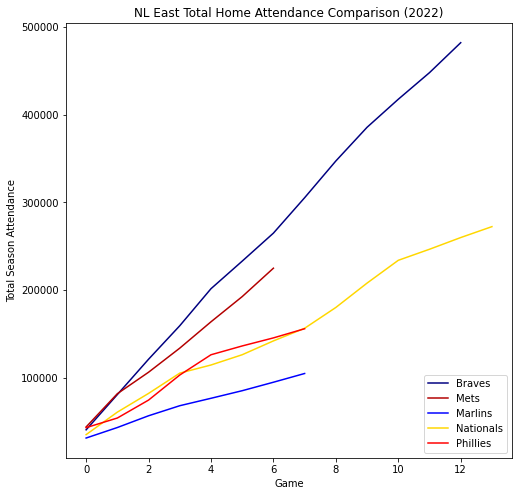

In [50]:
# Graph Total Home Attendance Comparison #
plt.rcParams["figure.figsize"] = (8,8)

# Create new Series for home attendance #
braves_attendance = braves['Total_Home_Attendance'].dropna()
braves_attendance.index = range(len(braves_attendance))

mets_attendance = mets['Total_Home_Attendance'].dropna()
mets_attendance.index = range(len(mets_attendance))

marlins_attendance = marlins['Total_Home_Attendance'].dropna()
marlins_attendance.index = range(len(marlins_attendance))

nationals_attendance = nationals['Total_Home_Attendance'].dropna()
nationals_attendance.index = range(len(nationals_attendance))

phillies_attendance = phillies['Total_Home_Attendance'].dropna()
phillies_attendance.index = range(len(phillies_attendance))

plt.plot(braves_attendance, label='Braves', c='navy')
plt.plot(mets_attendance, label='Mets', c='#b30000')
plt.plot(marlins_attendance, label='Marlins', c='blue')
plt.plot(nationals_attendance, label='Nationals', c='gold')
plt.plot(phillies_attendance, label='Phillies', c='red')

plt.xlabel('Game')
plt.ylabel('Total Season Attendance')

plt.title("NL East Total Home Attendance Comparison ({})".format(year))
plt.legend(loc='lower right')